In [11]:
import sys
sys.path.append('../scripts')
sys.path.append('..')

from genstats import construct_data, hash_matrix_to_int
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import bhtsne
import numpy as  np

import os
%matplotlib inline
import matplotlib.pyplot as plt

import theano

from tasks import check
import theano.tensor as T

In [12]:
v = check(
    what="notebook", 
    filename="../models/model_E.pkl", 
    #force_w=28,
    #force_h=28,
    #force_c=1,
    dataset='digits',
    #force_model_params=dict(use_wta_lifetime=False)
)
capsule, data, layers, _, _, _ = v

Loading data...


INFO:tasks:Loading data...


(None, 1, 28, 28)
28
(None, 1, 28, 28)
28
Loading the model...


INFO:tasks:Loading the model...


(None, 1, 28, 28)
Compiling the model...


INFO:tasks:Compiling the model...


{'patience_stat': 'avg_loss_train_fix', 'epsilon': 1e-08, 'max_nb_epochs': 100000, 'batch_size': 128, 'initial_lr': 0.1, 'patience_nb_epochs': 800, 'lr_decay_method': 'none', 'beta2': 0.95, 'beta1': 0.95, 'min_nb_epochs': 100000, 'lr_decay': 0, 'momentum': 0.9, 'algo': 'adadelta'}


In [13]:
from lasagne.layers.helper import get_output
x = T.tensor4()
fn = theano.function([x], get_output(layers['conv3'], x))

In [14]:
s = '7246945622660025f8fba4054409c661/'
folder = "../jobs/results/{}".format(s)
hash_matrix_filename = os.path.join(folder, "csv", "hashmatrix.npy")
hash_matrix = np.load(hash_matrix_filename)
X = construct_data(folder, hash_matrix)
X -= X.min()
X /= X.max()

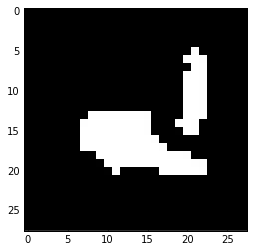

In [15]:
plt.imshow(X[40].reshape((28, 28)), cmap='gray', interpolation='none')

In [16]:
print(X.shape)
feats = fn(X.reshape((X.shape[0], 1, 28, 28)))
feats = feats.max(axis=(2, 3))
feats.reshape((feats.shape[0], -1))

(9996, 784)


array([[  5.27879572,   8.84663582,   7.44066429, ...,  10.7334156 ,
         23.30034447,   5.72803783],
       [ 14.91735458,  10.18962765,  12.74628925, ...,  21.93607521,
         13.54165649,  16.66671944],
       [ 12.03690529,  13.57129288,   3.98529935, ...,   6.13492346,
         10.51924896,   4.08577251],
       ..., 
       [  3.37472534,  14.03190422,  13.94410706, ...,   1.88545978,
          3.61700869,   2.79860759],
       [  8.21241856,   5.21393538,   8.43929672, ...,   3.24012446,
          5.88426495,  10.40205002],
       [  4.88535786,  10.20647812,  16.48098755, ...,   7.84086847,
         13.49138451,   6.51506042]], dtype=float32)

In [40]:
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding, TSNE
#d= Isomap(geom=geom, random_state=6).fit_transform(feats[0:10000])

d = TSNE(
    perplexity=15, 
    early_exaggeration=4, 
    n_components=2, 
    learning_rate=1000.0, 
    n_iter=1000, 
    n_iter_without_progress=30, 
    min_grad_norm=1e-07, 
    metric='euclidean', 
    init='random', 
    random_state=None, 
    method='barnes_hut',
    angle=0.5,
    verbose=2).fit_transform(X[0:5000])
#d = PCA(n_components=2).fit_transform(feats)
#d = LocallyLinearEmbedding(n_components=2).fit_transform(feats)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.194438
[t-SNE] Iteration 25: error = 2.2405775, gradient norm = 0.0096580
[t-SNE] Iteration 50: error = 2.1979814, gradient norm = 0.0057942
[t-SNE] Iteration 75: error = 2.0239084, gradient norm = 0.0022771
[t-SNE] Iteration 100: error = 1.9776272, gradient norm = 0.0019512
[t-SNE] Error after 100 iterations with early exaggeration: 1.977627
[t-SNE] Iteration 125: error = 1.8941900, gradient norm = 0.0015288
[t-SNE] Iteration 150: error = 1.8658301, gradient norm = 0.0014050
[t-SNE] Iteration 175: error = 1.8585749, gradient norm = 0.0013750
[t-SNE] Iteration

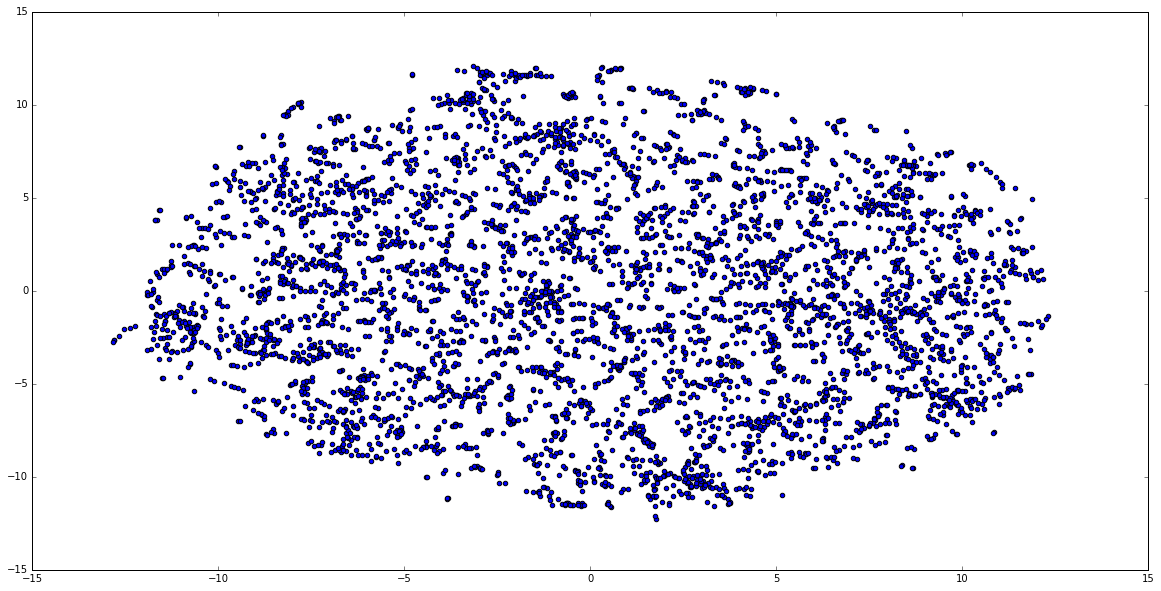

In [41]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(d[:, 0], d[:, 1])

In [5]:
from lightjob.cli import load_db
import cPickle as pickle


In [6]:
db = load_db()

In [ ]:
J = db.jobs_with(state='success', type='training')
binaries = []
non_binaries = []
for j in J:
    data = pickle.load(open('../jobs/results/{}/model.pkl'.format(j['summary'])))

    if (j['content']['binarize_thresh']==0.5):
        binaries.append(data['info']['stats'][-1]['avg_loss_train'])
    else:
        non_binaries.append(data['info']['stats'][-1]['avg_loss_train'])

In [9]:
print(binaries)

[OrderedDict([('epoch', 99999), ('loss_std', 0.0), ('loss_train', 58.738747), ('avg_loss_train', 56.440477331793296), ('avg_loss_train_fix', 56.440477331793296)]), OrderedDict([('epoch', 99999), ('loss_std', 0.0), ('loss_train', 125.22941), ('avg_loss_train', 121.8894122366207), ('avg_loss_train_fix', 121.8894122366207)]), OrderedDict([('epoch', 99999), ('loss_std', 0.0), ('loss_train', 56.972397), ('avg_loss_train', 55.138274579113308), ('avg_loss_train_fix', 55.138274579113308)]), OrderedDict([('epoch', 99999), ('loss_std', 0.0), ('loss_train', 12.358829), ('avg_loss_train', 11.941202653700573), ('avg_loss_train_fix', 11.941202653700573)]), OrderedDict([('epoch', 87562), ('loss_std', 0.0), ('loss_train', 0.025812306), ('avg_loss_train', 0.034296785958736531), ('avg_loss_train_fix', 0.034296785958736531)]), OrderedDict([('epoch', 99999), ('loss_std', 0.0), ('loss_train', 78.26947), ('avg_loss_train', 75.637438152796534), ('avg_loss_train_fix', 75.637438152796534)]), OrderedDict([('epo